
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [161]:

import numpy as np
import matplotlib.pyplot as plt


In [162]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it

class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.std[self.std == 0] = 1  # avoid division by zero
        return self.mean, self.std

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)




In [163]:
# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used

class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.history = np.zeros(epochs)

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0.0

        for epoch in range(self.epochs):
            y_pred = X @ self.weights + self.bias

            # Loss
            mse = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
            l2_penalty = (self.l2_lambda / (2 * m)) * np.sum(self.weights ** 2)
            loss = mse + l2_penalty
            self.history[epoch] = loss

            # Gradients
            dw = (1 / m) * (X.T @ (y_pred - y)) + (self.l2_lambda / m) * self.weights
            db = (1 / m) * np.sum(y_pred - y)

            # Update
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

        return self.weights, self.bias, self.history

    def predict(self, X):
        return X @ self.weights + self.bias



In [164]:
# Generate a Dataset
np.random.seed(42)

m = 200
X = np.random.rand(m, 2)
true_w = np.array([3.5, -2.0])
true_b = 1.5

y = X @ true_w + true_b + np.random.randn(m) * 0.4


In [165]:
# Train model
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LinearRegressionManual(
    lr=0.1,
    epochs=1000,
    l2_lambda=0.1
)

w, b, history = model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)


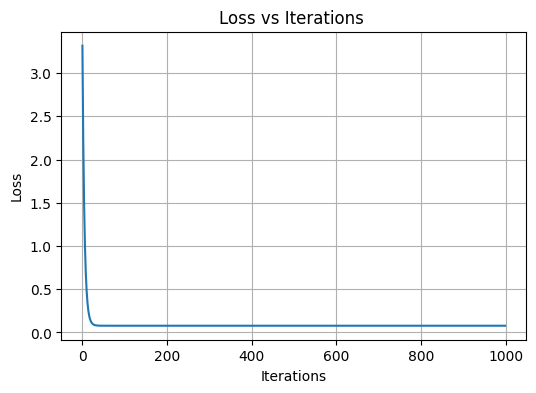

In [166]:
# ploting results
plt.figure(figsize=(6,4))
plt.plot(history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations ")
plt.grid(True)
plt.show()



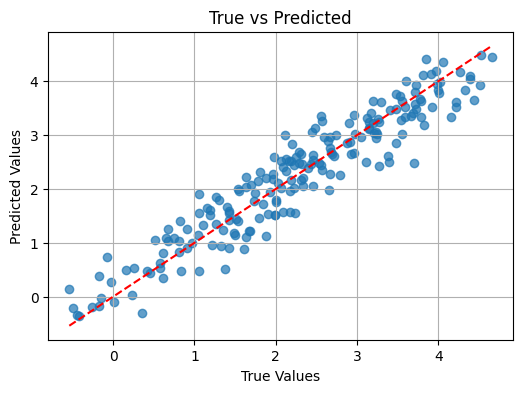

In [167]:
# ploting result
plt.figure(figsize=(6,4))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.grid(True)
plt.show()



In [168]:
# Bonus task
model_no_scale = LinearRegressionManual(
    lr=0.0005,     # very small LR required
    epochs=1000,
    l2_lambda=0.0
)

_, _, history_no_scale = model_no_scale.fit(X, y)


In [169]:
model_scaled = LinearRegressionManual(
    lr=0.1,
    epochs=1000,
    l2_lambda=0.0
)

_, _, history_scaled = model_scaled.fit(X_scaled, y)


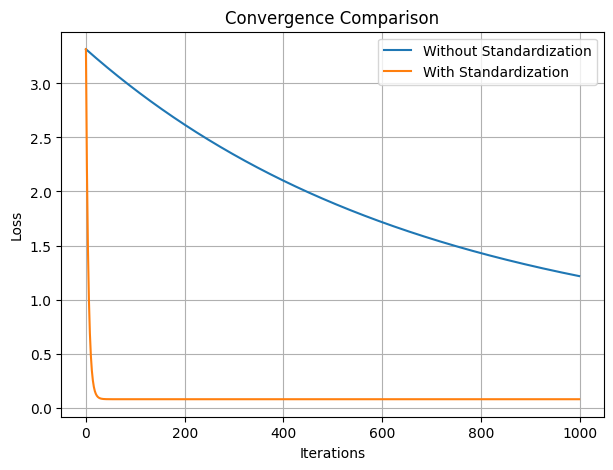

In [170]:
plt.figure(figsize=(7,5))
plt.plot(history_no_scale, label="Without Standardization")
plt.plot(history_scaled, label="With Standardization")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Convergence Comparison")
plt.legend()
plt.grid(True)
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [171]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [172]:

#Implement Logistic Regression from scratch and here also add the regularizaation term

class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.history = np.zeros(epochs)

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0.0

        for epoch in range(self.epochs):
            # Forward pass
            z = X @ self.weights + self.bias
            y_pred = sigmoid(z)

            # Loss (BCE + L2)
            bce = -np.mean(
                y * np.log(y_pred + 1e-8) +
                (1 - y) * np.log(1 - y_pred + 1e-8)
            )
            l2_penalty = (self.l2_lambda / (2 * m)) * np.sum(self.weights ** 2)
            loss = bce + l2_penalty
            self.history[epoch] = loss

            # Gradients
            dw = (1 / m) * (X.T @ (y_pred - y)) + (self.l2_lambda / m) * self.weights
            db = (1 / m) * np.sum(y_pred - y)

            # Update
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

        return self.weights, self.bias, self.history

    def predict_proba(self, X):
        return sigmoid(X @ self.weights + self.bias)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


In [173]:
# Generate dataset
np.random.seed(0)

m = 300
X = np.random.randn(m, 2)

# Linear decision boundary
y = (X[:, 0] + X[:, 1] > 0).astype(int)


In [174]:
# Train model
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LogisticRegressionManual(
    lr=0.1,
    epochs=1000,
    l2_lambda=0.1
)

weights, bias, history = model.fit(X_scaled, y)


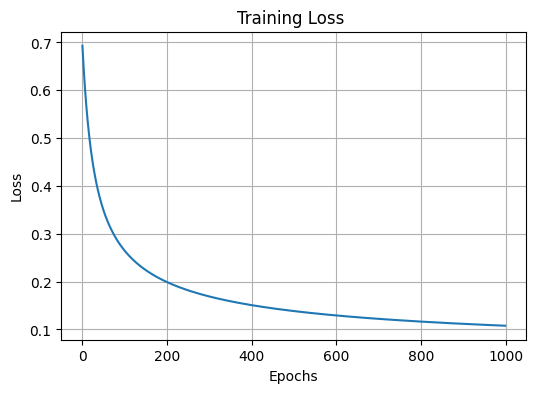

In [175]:
# ploting
plt.figure(figsize=(6,4))
plt.plot(history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss ")
plt.grid(True)
plt.show()


In [176]:
# Accuracy
y_pred = model.predict(X_scaled)
accuracy = np.mean(y_pred == y)

print(f"Final Training Accuracy: {accuracy * 100:.2f}%")


Final Training Accuracy: 99.67%


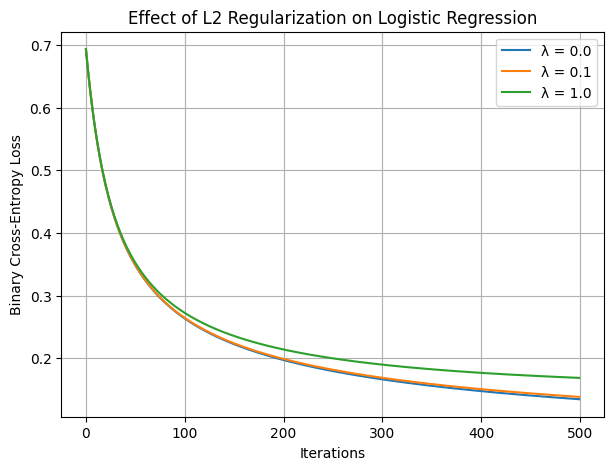

In [177]:
# Bonus task
plt.figure(figsize=(7,5))

for lam in [0.0, 0.1, 1.0]:
    model = LogisticRegressionManual(
        lr=0.1,
        epochs=500,
        l2_lambda=lam
    )

    model.fit(X_scaled, y)
    plt.plot(model.history, label=f"λ = {lam}")

plt.xlabel("Iterations")
plt.ylabel("Binary Cross-Entropy Loss")
plt.legend()
plt.title("Effect of L2 Regularization on Logistic Regression")
plt.grid(True)
plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [178]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):

    '''
    Parameters:
    M : numpy array of shape (m, n)
    k : number of clusters
    max_iters : maximum number of iterations

    Returns:
    assignment_table : same shape as M, contains cluster labels
    cookbook : dict -> cluster_id : list of (i, j) positions
    centroids : numpy array of centroid values
    '''
    m, n = M.shape

    # Flatten matrix values
    data = M.flatten()

    # Initialize centroids randomly from data
    centroids = np.random.choice(data, size=k, replace=False)

    # Assignment table
    assignment_table = np.zeros((m, n), dtype=int)

    for iteration in range(max_iters):
        cookbook = {i: [] for i in range(k)}

        # Assignment step
        for i in range(m):
            for j in range(n):
                distances = np.abs(M[i, j] - centroids)
                cluster_id = np.argmin(distances)

                assignment_table[i, j] = cluster_id
                cookbook[cluster_id].append((i, j))

        prev_centroids = centroids.copy()

        # Update step
        for cluster_id in range(k):
            if cookbook[cluster_id]:  # avoid empty clusters
                cluster_values = [M[i, j] for (i, j) in cookbook[cluster_id]]
                centroids[cluster_id] = np.mean(cluster_values)

        # Convergence check
        if np.allclose(prev_centroids, centroids):
            break

    return assignment_table, cookbook, centroids



In [179]:
# Call the Function on a Matrix
np.random.seed(42)

# Example matrix
M = np.random.randint(0, 100, size=(6, 8))
k = 3

assignment_table, cookbook, centroids = kmeans_matrix(M, k)


In [180]:
# Print Outputs
print("Original Matrix M:\n", M)

print("\nAssignment Table:")
print(assignment_table)

print("\nCentroids:")
print(centroids)

print("\nCookbook:")
for cluster_id, positions in cookbook.items():
    print(f"Cluster {cluster_id}: {positions}")


Original Matrix M:
 [[51 92 14 71 60 20 82 86]
 [74 74 87 99 23  2 21 52]
 [ 1 87 29 37  1 63 59 20]
 [32 75 57 21 88 48 90 58]
 [41 91 59 79 14 61 61 46]
 [61 50 54 63  2 50  6 20]]

Assignment Table:
[[1 2 0 2 1 0 2 2]
 [2 2 2 2 0 0 0 1]
 [0 2 0 1 0 1 1 0]
 [0 2 1 0 2 1 2 1]
 [1 2 1 2 0 1 1 1]
 [1 1 1 1 0 1 0 0]]

Centroids:
[15 54 83]

Cookbook:
Cluster 0: [(0, 2), (0, 5), (1, 4), (1, 5), (1, 6), (2, 0), (2, 2), (2, 4), (2, 7), (3, 0), (3, 3), (4, 4), (5, 4), (5, 6), (5, 7)]
Cluster 1: [(0, 0), (0, 4), (1, 7), (2, 3), (2, 5), (2, 6), (3, 2), (3, 5), (3, 7), (4, 0), (4, 2), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1), (5, 2), (5, 3), (5, 5)]
Cluster 2: [(0, 1), (0, 3), (0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 3), (2, 1), (3, 1), (3, 4), (3, 6), (4, 1), (4, 3)]


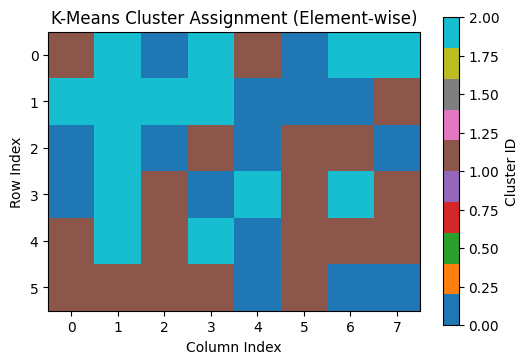

In [181]:
# Visualize Cluster Assignments
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.imshow(assignment_table, cmap='tab10')
plt.colorbar(label='Cluster ID')
plt.title("K-Means Cluster Assignment (Element-wise)")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
